In [1]:
import datetime as dt
import pandas as pd 
!pip install yfinance
import yfinance as yf
import pandas_datareader as dr
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas_datareader import data
import numpy as np
%matplotlib inline

In [2]:
sp_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp_tickers = sp_tickers[0]
tickers = sp_tickers['Symbol'].values.tolist()
indexG = '^GSPC'
tickers.insert(0, indexG)
print(tickers)

#αποθηκεύω τα ονόματα των μετοχών που θα χρησιμοποιήσω

['^GSPC', 'MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX',

In [3]:
data_stocks = pd.DataFrame()


In [4]:
data_stocks = yf.download(tickers, start = '2009-12-31', end = '2020-12-31' )['Adj Close']
data_stocks
#κατεβάζω τα δεδομένα από τα ονόματα των μετοχών που θα χρησιμοποιήσω

[*********************100%***********************]  504 of 504 completed

4 Failed downloads:
- CEG: Data doesn't exist for startDate = 1262235600, endDate = 1609390800
- OGN: Data doesn't exist for startDate = 1262235600, endDate = 1609390800
- BRK.B: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.182236,4.562868,37.648968,6.415357,NaN,21.438490,8.730000,19.352556,7.950000,32.524193,...,13.687506,41.415257,32.226292,NaN,19.549162,52.388943,28.350000,10.710710,NaN,1115.099976
2010-01-04,20.331635,4.496875,37.555950,6.515211,NaN,21.899008,8.740000,19.521019,7.994444,32.970917,...,13.597207,41.998314,32.372887,NaN,19.616245,53.195465,28.670000,11.128122,NaN,1132.989990
2010-01-05,20.110779,5.005957,37.332737,6.526475,NaN,21.742754,8.530000,19.363310,7.967778,33.174683,...,13.435950,42.162292,31.988054,NaN,19.549162,54.879425,28.620001,11.520487,NaN,1136.520020
2010-01-06,20.039328,4.798555,37.658249,6.422663,NaN,21.537178,8.400000,19.470846,7.933333,33.527340,...,13.461746,42.526707,32.198792,NaN,19.409405,54.861702,28.400000,12.522265,NaN,1137.140015
2010-01-07,20.013348,4.939965,37.648968,6.410791,NaN,21.191793,8.400000,19.632137,7.886667,33.496006,...,13.403703,42.393078,32.620289,NaN,19.403822,56.120239,27.690001,13.924756,NaN,1141.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,115.889114,15.890000,152.986465,129.406586,94.857178,94.588081,304.049988,104.068108,35.080002,250.874222,...,61.272850,37.848843,50.718594,97.518707,103.048706,142.560242,379.739990,41.290276,157.816162,3690.010010
2020-12-24,115.898994,15.660000,154.321442,130.404572,94.838806,94.325455,303.410004,104.939781,34.860001,250.737823,...,61.577736,37.694801,50.924965,98.027161,103.772423,143.049011,376.890015,41.128952,158.675095,3703.060059
2020-12-28,116.412750,16.059999,152.515839,135.068588,95.013321,94.160088,312.910004,104.397408,35.330002,253.057098,...,62.235157,37.821659,51.406502,98.144516,105.933960,142.703995,382.589996,41.147934,160.323822,3735.360107


In [5]:
dd = data_stocks.copy()

print(type(dd))
ddt = dd.index
dd = dd.set_index(ddt)
dd

# μεταφέρω τα δεδομένα σε ένα άλλο μέρος

<class 'pandas.core.frame.DataFrame'>


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.182236,4.562868,37.648968,6.415357,NaN,21.438490,8.730000,19.352556,7.950000,32.524193,...,13.687506,41.415257,32.226292,NaN,19.549162,52.388943,28.350000,10.710710,NaN,1115.099976
2010-01-04,20.331635,4.496875,37.555950,6.515211,NaN,21.899008,8.740000,19.521019,7.994444,32.970917,...,13.597207,41.998314,32.372887,NaN,19.616245,53.195465,28.670000,11.128122,NaN,1132.989990
2010-01-05,20.110779,5.005957,37.332737,6.526475,NaN,21.742754,8.530000,19.363310,7.967778,33.174683,...,13.435950,42.162292,31.988054,NaN,19.549162,54.879425,28.620001,11.520487,NaN,1136.520020
2010-01-06,20.039328,4.798555,37.658249,6.422663,NaN,21.537178,8.400000,19.470846,7.933333,33.527340,...,13.461746,42.526707,32.198792,NaN,19.409405,54.861702,28.400000,12.522265,NaN,1137.140015
2010-01-07,20.013348,4.939965,37.648968,6.410791,NaN,21.191793,8.400000,19.632137,7.886667,33.496006,...,13.403703,42.393078,32.620289,NaN,19.403822,56.120239,27.690001,13.924756,NaN,1141.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,115.889114,15.890000,152.986465,129.406586,94.857178,94.588081,304.049988,104.068108,35.080002,250.874222,...,61.272850,37.848843,50.718594,97.518707,103.048706,142.560242,379.739990,41.290276,157.816162,3690.010010
2020-12-24,115.898994,15.660000,154.321442,130.404572,94.838806,94.325455,303.410004,104.939781,34.860001,250.737823,...,61.577736,37.694801,50.924965,98.027161,103.772423,143.049011,376.890015,41.128952,158.675095,3703.060059
2020-12-28,116.412750,16.059999,152.515839,135.068588,95.013321,94.160088,312.910004,104.397408,35.330002,253.057098,...,62.235157,37.821659,51.406502,98.144516,105.933960,142.703995,382.589996,41.147934,160.323822,3735.360107


In [6]:
dd = dd.resample('M').last()
dd

#μετατρέπω τα δεδομένα σε μηνιαία

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.182236,4.562868,37.648968,6.415357,NaN,21.438490,8.730000,19.352556,7.950000,32.524193,...,13.687506,41.415257,32.226292,NaN,19.549162,52.388943,28.350000,10.710710,NaN,1115.099976
2010-01-31,18.207535,5.005957,36.690979,5.846979,NaN,22.417086,7.920000,19.114765,7.948889,32.124500,...,13.403703,39.131611,30.723560,NaN,19.236551,49.916157,26.100000,15.836494,NaN,1073.869995
2010-02-28,20.435566,6.910295,37.946556,6.229348,NaN,23.126629,10.110000,19.598598,8.220000,31.325119,...,13.423048,39.735348,30.320377,NaN,18.961023,50.811333,28.570000,15.486120,NaN,1104.489990
2010-03-31,22.338818,6.929150,39.041527,7.154223,NaN,23.852425,10.320000,19.020891,8.472222,32.876881,...,13.832237,40.945751,32.006847,NaN,21.553259,52.468697,29.600000,18.242554,NaN,1169.430054
2010-04-30,23.553513,6.665183,42.003166,7.948493,NaN,25.444248,9.640000,18.627693,8.397778,34.501534,...,14.191087,41.428673,33.631050,NaN,23.975420,53.984280,29.049999,23.997643,NaN,1186.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,99.033577,13.050000,149.649414,127.289711,86.777908,93.992393,307.619995,105.672325,31.540001,232.898804,...,65.343292,35.338047,43.906895,78.179665,92.077972,134.571899,286.529999,30.257149,157.865372,3500.310059
2020-09-30,99.546394,12.290000,147.197128,114.239174,79.365936,93.885834,277.059998,105.054527,29.250000,219.367325,...,65.318512,30.374437,42.891747,82.021370,87.707031,130.273544,252.460007,27.491102,163.061813,3363.000000
2020-10-31,100.862045,11.280000,141.232513,107.383446,78.159821,93.062447,251.880005,101.801758,30.209999,211.377914,...,66.283943,28.861469,46.285423,84.966034,89.657143,126.407616,283.640015,30.360640,156.532669,3269.959961


In [7]:
dd =dd.dropna(axis = 1)
dd

#αφαιρώ όσες μετοχές έχουν έστω και ένα μη-αριθμό σε ημερομηνίες

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.182236,4.562868,37.648968,6.415357,21.438490,8.730000,19.352556,7.950000,32.524193,36.779999,...,10.259046,38.204311,13.687506,41.415257,32.226292,19.549162,52.388943,28.350000,10.710710,1115.099976
2010-01-31,18.207535,5.005957,36.690979,5.846979,22.417086,7.920000,19.114765,7.948889,32.124500,32.299999,...,9.499976,40.599049,13.403703,39.131611,30.723560,19.236551,49.916157,26.100000,15.836494,1073.869995
2010-02-28,20.435566,6.910295,37.946556,6.229348,23.126629,10.110000,19.598598,8.220000,31.325119,34.650002,...,9.619021,41.707844,13.423048,39.735348,30.320377,18.961023,50.811333,28.570000,15.486120,1104.489990
2010-03-31,22.338818,6.929150,39.041527,7.154223,23.852425,10.320000,19.020891,8.472222,32.876881,35.369999,...,10.778543,49.751541,13.832237,40.945751,32.006847,21.553259,52.468697,29.600000,18.242554,1169.430054
2010-04-30,23.553513,6.665183,42.003166,7.948493,25.444248,9.640000,18.627693,8.397778,34.501534,33.599998,...,11.802218,57.893677,14.191087,41.428673,33.631050,23.975420,53.984280,29.049999,23.997643,1186.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,99.033577,13.050000,149.649414,127.289711,93.992393,307.619995,105.672325,31.540001,232.898804,513.390015,...,27.588562,87.449997,65.343292,35.338047,43.906895,92.077972,134.571899,286.529999,30.257149,3500.310059
2020-09-30,99.546394,12.290000,147.197128,114.239174,93.885834,277.059998,105.054527,29.250000,219.367325,490.429993,...,25.959286,71.809998,65.318512,30.374437,42.891747,87.707031,130.273544,252.460007,27.491102,3363.000000
2020-10-31,100.862045,11.280000,141.232513,107.383446,93.062447,251.880005,101.801758,30.209999,211.377914,447.100006,...,24.839724,72.430000,66.283943,28.861469,46.285423,89.657143,126.407616,283.640015,30.360640,3269.959961


In [8]:
dd = np.log(dd/dd.shift(1))
dd
#μετατρέπω τα δεδομένα μου σε συνεχή

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-31,-0.102967,0.092677,-0.025775,-0.092770,0.044636,-0.097374,-0.012363,-0.000140,-0.012365,-0.129887,...,-0.076871,0.060796,-0.020952,-0.056719,-0.047753,-0.016120,-0.048351,-0.082692,0.391073,-0.037675
2010-02-28,0.115441,0.322384,0.033648,0.063346,0.031161,0.244134,0.024997,0.033538,-0.025199,0.070231,...,0.012453,0.026945,0.001442,0.015311,-0.013210,-0.014427,0.017775,0.090422,-0.022373,0.028115
2010-03-31,0.089049,0.002725,0.028447,0.138431,0.030901,0.020559,-0.029920,0.030223,0.048349,0.020566,...,0.113815,0.176352,0.030029,0.030007,0.054130,0.128142,0.032097,0.035417,0.163813,0.057133
2010-04-30,0.052949,-0.038840,0.073119,0.105279,0.064604,-0.068163,-0.020889,-0.008826,0.048234,-0.051338,...,0.090730,0.151567,0.025612,0.011725,0.049500,0.106502,0.028476,-0.018756,0.274199,0.014651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.041582,0.160043,0.040273,0.196035,-0.027951,0.025283,0.084101,0.025367,0.065225,0.144491,...,0.086082,0.188447,0.006209,-0.032659,0.006036,0.056255,0.043671,0.020379,0.000061,0.067719
2020-09-30,0.005165,-0.060002,-0.016523,-0.108171,-0.001134,-0.104631,-0.005864,-0.075377,-0.059856,-0.045753,...,-0.060872,-0.197043,-0.000379,-0.151359,-0.023392,-0.048634,-0.032462,-0.126590,-0.095870,-0.040018
2020-10-31,0.013130,-0.085755,-0.041365,-0.061888,-0.008809,-0.095281,-0.031452,0.032293,-0.037100,-0.092500,...,-0.044085,0.008597,0.014672,-0.051094,0.076148,0.021991,-0.030125,0.116453,0.099285,-0.028056


In [9]:
dd.dropna(axis = 0, inplace = True)
dd

#αφαιρώ την πρώτη γραμμή η οποία είναι μη-αριθμός

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,-0.102967,0.092677,-0.025775,-0.092770,0.044636,-0.097374,-0.012363,-0.000140,-0.012365,-0.129887,...,-0.076871,0.060796,-0.020952,-0.056719,-0.047753,-0.016120,-0.048351,-0.082692,0.391073,-0.037675
2010-02-28,0.115441,0.322384,0.033648,0.063346,0.031161,0.244134,0.024997,0.033538,-0.025199,0.070231,...,0.012453,0.026945,0.001442,0.015311,-0.013210,-0.014427,0.017775,0.090422,-0.022373,0.028115
2010-03-31,0.089049,0.002725,0.028447,0.138431,0.030901,0.020559,-0.029920,0.030223,0.048349,0.020566,...,0.113815,0.176352,0.030029,0.030007,0.054130,0.128142,0.032097,0.035417,0.163813,0.057133
2010-04-30,0.052949,-0.038840,0.073119,0.105279,0.064604,-0.068163,-0.020889,-0.008826,0.048234,-0.051338,...,0.090730,0.151567,0.025612,0.011725,0.049500,0.106502,0.028476,-0.018756,0.274199,0.014651
2010-05-31,-0.113792,0.222294,0.137736,-0.016256,0.016391,0.011346,-0.072966,-0.027634,-0.151100,-0.046293,...,-0.150992,-0.047420,-0.059677,-0.107369,-0.122330,-0.035268,-0.085297,-0.054832,-0.181614,-0.085532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.041582,0.160043,0.040273,0.196035,-0.027951,0.025283,0.084101,0.025367,0.065225,0.144491,...,0.086082,0.188447,0.006209,-0.032659,0.006036,0.056255,0.043671,0.020379,0.000061,0.067719
2020-09-30,0.005165,-0.060002,-0.016523,-0.108171,-0.001134,-0.104631,-0.005864,-0.075377,-0.059856,-0.045753,...,-0.060872,-0.197043,-0.000379,-0.151359,-0.023392,-0.048634,-0.032462,-0.126590,-0.095870,-0.040018
2020-10-31,0.013130,-0.085755,-0.041365,-0.061888,-0.008809,-0.095281,-0.031452,0.032293,-0.037100,-0.092500,...,-0.044085,0.008597,0.014672,-0.051094,0.076148,0.021991,-0.030125,0.116453,0.099285,-0.028056


In [10]:
tickers = [tag for tag in dd.columns]
print(tickers)

#αφαιρώ τα ονόματα των μετοχών τα οποία είχαν μη αριθμό

['A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABMD', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CE', 'CF', 'CHD', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'ELV', 'EMN'

In [11]:
stocksrf = pd.DataFrame()
stocksrf = pd.read_csv('TB3MS.csv')# risk free rate from FRED
stocksrf['Dates'] = dd.index
stocksrf

#αποθηκεύω την σταθερή απόδοση στον πίνακα stocksrf 

,TB3MS,Dates
0,0.06,2010-01-31
1,0.11,2010-02-28
2,0.15,2010-03-31
3,0.16,2010-04-30
4,0.16,2010-05-31
...,...,...
127,0.10,2020-08-31
128,0.11,2020-09-30
129,0.10,2020-10-31
130,0.09,2020-11-30


In [12]:
SP_I = pd.DataFrame()
SP_I = stocksrf.set_index('Dates')
SP_I['SP500'] = dd['^GSPC']
SP_I['SP500-rf'] = SP_I['SP500'] - SP_I['TB3MS']
SP_I

#φτιάχνω ένα νέο πίνακα, αποθηκεύοντας σταθερή και αγοραία απόδοση και αφαιρόντας τα δύο
#προκειμένου να βρω αργότερα το βήτα

,TB3MS,SP500,SP500-rf
Dates,,,
2010-01-31,0.06,-0.037675,-0.097675
2010-02-28,0.11,0.028115,-0.081885
2010-03-31,0.15,0.057133,-0.092867
2010-04-30,0.16,0.014651,-0.145349
2010-05-31,0.16,-0.085532,-0.245532
...,...,...,...
2020-08-31,0.10,0.067719,-0.032281
2020-09-30,0.11,-0.040018,-0.150018
2020-10-31,0.10,-0.028056,-0.128056


In [13]:
stocks_minus_ref = pd.DataFrame()
for tag in dd.columns:
    stocks_minus_ref[tag] = dd[tag] - SP_I['TB3MS']
    
#φτιάχνω έναν νέο πίνακα όπου από όλες τις μετοχές έχω αφαιρέσει την σταθερή απόδοση
#προκειμένου να βρω την συνδιακύμανση

C:\Users\30698\AppData\Local\Temp\ipykernel_9624\397454495.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stocks_minus_ref[tag] = dd[tag] - SP_I['TB3MS']
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\397454495.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stocks_minus_ref[tag] = dd[tag] - SP_I['TB3MS']
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\397454495.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\30698\AppData\Local\Temp\ipykernel_9624\397454495.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stocks_minus_ref[tag] = dd[tag] - SP_I['TB3MS']
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\397454495.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stocks_minus_ref[tag] = dd[tag] - SP_I['TB3MS']
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\397454495.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

In [14]:
del stocks_minus_ref['^GSPC']


stocks_minus_ref

#βγάζω την στήλη με το δείκτη μείον την σταθερή απόδοση

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACGL,ACN,ADBE,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,-0.162967,0.032677,-0.085775,-0.152770,-0.015364,-0.157374,-0.072363,-0.060140,-0.072365,-0.189887,...,-0.065703,-0.136871,0.000796,-0.080952,-0.116719,-0.107753,-0.076120,-0.108351,-0.142692,0.331073
2010-02-28,0.005441,0.212384,-0.076352,-0.046654,-0.078839,0.134134,-0.085003,-0.076462,-0.135199,-0.039769,...,0.016934,-0.097547,-0.083055,-0.108558,-0.094689,-0.123210,-0.124427,-0.092225,-0.019578,-0.132373
2010-03-31,-0.060951,-0.147275,-0.121553,-0.011569,-0.119099,-0.129441,-0.179920,-0.119777,-0.101651,-0.129434,...,-0.092339,-0.036185,0.026352,-0.119971,-0.119993,-0.095870,-0.021858,-0.117903,-0.114583,0.013813
2010-04-30,-0.107051,-0.198840,-0.086881,-0.054721,-0.095396,-0.228163,-0.180889,-0.168826,-0.111766,-0.211338,...,-0.063790,-0.069270,-0.008433,-0.134388,-0.148275,-0.110500,-0.053498,-0.131524,-0.178756,0.114199
2010-05-31,-0.273792,0.062294,-0.022264,-0.176256,-0.143609,-0.148654,-0.232966,-0.187634,-0.311100,-0.206293,...,-0.277855,-0.310992,-0.207420,-0.219677,-0.267369,-0.282330,-0.195268,-0.245297,-0.214832,-0.341614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,-0.058418,0.060043,-0.059727,0.096035,-0.127951,-0.074717,-0.015899,-0.074633,-0.034775,0.044491,...,-0.121563,-0.013918,0.088447,-0.093791,-0.132659,-0.093964,-0.043745,-0.056329,-0.079621,-0.099939
2020-09-30,-0.104835,-0.170002,-0.126523,-0.218171,-0.111134,-0.214631,-0.115864,-0.185377,-0.169856,-0.155753,...,-0.090826,-0.170872,-0.307043,-0.110379,-0.261359,-0.133392,-0.158634,-0.142462,-0.236590,-0.205870
2020-10-31,-0.086870,-0.185755,-0.141365,-0.161888,-0.108809,-0.195281,-0.131452,-0.067707,-0.137100,-0.192500,...,-0.234832,-0.144085,-0.091403,-0.085328,-0.151094,-0.023852,-0.078009,-0.130125,0.016453,-0.000715


In [15]:
beta = pd.DataFrame()
covar= stocks_minus_ref.rolling(window=12).cov(SP_I['SP500-rf'])
for tag in stocks_minus_ref.columns:
    beta[tag] = covar[tag]/ SP_I['SP500-rf'].rolling(window=12).var()
beta

#βρίσκω το βήτα από συνδιακύμανση προς διακύμανση
#beta = cov(Ri - Rf,Rm - Rf)/var(Rm - Rf)

C:\Users\30698\AppData\Local\Temp\ipykernel_9624\3020557805.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  beta[tag] = covar[tag]/ SP_I['SP500-rf'].rolling(window=12).var()
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\3020557805.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  beta[tag] = covar[tag]/ SP_I['SP500-rf'].rolling(window=12).var()
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\3020557805.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\30698\AppData\Local\Temp\ipykernel_9624\3020557805.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  beta[tag] = covar[tag]/ SP_I['SP500-rf'].rolling(window=12).var()
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\3020557805.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  beta[tag] = covar[tag]/ SP_I['SP500-rf'].rolling(window=12).var()
C:\Users\30698\AppData\Local\Temp\ipykernel_9624\3020557805.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACGL,ACN,ADBE,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.997863,0.982206,1.006571,1.022704,0.983586,1.088531,1.027689,0.956133,1.025271,1.007562,...,0.996136,1.011604,0.984808,0.991784,0.991521,0.981096,1.029013,0.998336,1.014335,0.969100
2020-09-30,1.009142,1.000390,1.042144,1.011604,0.982090,1.067541,1.025320,0.965359,1.016877,0.989300,...,0.996867,1.020058,0.971593,0.996293,0.997996,0.989307,1.031477,0.997079,1.002115,0.981263
2020-10-31,1.004054,1.033203,1.043199,1.011948,0.983332,1.087961,1.021175,0.972851,1.006760,0.969134,...,0.977807,1.028960,1.000620,0.992424,1.001543,1.005730,1.022381,0.996855,1.036508,1.014387


In [16]:
beta.dropna(inplace = True)

beta

#βγάζω όσες γραμμές είναι μη-αριθμός από τον πήνακα με τα βήτα

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACGL,ACN,ADBE,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,1.512894,0.717955,-0.005854,0.818171,0.732785,0.954497,0.637781,0.364275,1.275314,0.877319,...,1.122802,1.398900,1.269857,0.485469,0.821054,1.187257,0.613810,0.918470,0.890925,2.196124
2011-01-31,1.595790,0.635810,-0.018419,0.885509,0.664895,1.004789,0.588028,0.319586,1.265286,0.937477,...,1.113066,1.456295,1.231129,0.458314,0.835037,1.191641,0.598671,0.913801,0.940560,1.878718
2011-02-28,1.478684,0.054528,-0.101862,0.854604,0.677137,0.894037,0.593829,0.280612,1.325295,0.879021,...,0.987048,1.532967,1.286001,0.460127,0.880241,1.272831,0.690036,0.939618,0.789060,1.948807
2011-03-31,1.509325,0.112260,-0.038879,0.754982,0.744024,1.074024,0.700254,0.383786,1.402852,0.880325,...,1.029042,1.491208,1.196668,0.491095,0.897828,1.272647,0.627730,0.939655,0.858522,1.832235
2011-04-30,1.567513,0.285258,0.067699,0.745353,0.777184,1.286929,0.864911,0.507014,1.342131,0.875401,...,1.023083,1.168468,1.386606,0.571757,0.923946,1.222118,0.756048,1.083727,0.775990,1.887811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.997863,0.982206,1.006571,1.022704,0.983586,1.088531,1.027689,0.956133,1.025271,1.007562,...,0.996136,1.011604,0.984808,0.991784,0.991521,0.981096,1.029013,0.998336,1.014335,0.969100
2020-09-30,1.009142,1.000390,1.042144,1.011604,0.982090,1.067541,1.025320,0.965359,1.016877,0.989300,...,0.996867,1.020058,0.971593,0.996293,0.997996,0.989307,1.031477,0.997079,1.002115,0.981263
2020-10-31,1.004054,1.033203,1.043199,1.011948,0.983332,1.087961,1.021175,0.972851,1.006760,0.969134,...,0.977807,1.028960,1.000620,0.992424,1.001543,1.005730,1.022381,0.996855,1.036508,1.014387


In [17]:
ddates2 = SP_I.index[12:]
spread = pd.DataFrame(index = ddates2,columns = ['Momentum Beta Strategy'], dtype = 'float')
                      
for row in range(len(beta)):
    b_11 = beta.iloc[row]
    qcut_b_11 = pd.qcut(b_11,5, labels = False)
    winners = qcut_b_11.index[qcut_b_11 == 4]
    losers = qcut_b_11.index[qcut_b_11 == 0]
    rownew = row + 12
    if rownew >= len(dd):
        break
    else:
        winners_b = dd.iloc[rownew, dd.columns.isin(winners)]
        losers_b = dd.iloc[rownew, dd.columns.isin(losers)]
        spread.iloc[row] = winners_b.mean() - losers_b.mean()
        
spread
        
#κάνω την στατηγική μομέντουμ αγοράζοντας τις μετοχές με τις υψηλότερες αποδόσεις
#και πουλώντας τις μετοχές με τις χαμηλότερες αποδόσεις ανά μήνα

,Momentum Beta Strategy
Dates,
2011-01-31,0.030308
2011-02-28,0.008837
2011-03-31,-0.028919
2011-04-30,-0.022863
2011-05-31,-0.022933
...,...
2020-08-31,-0.005271
2020-09-30,0.008498
2020-10-31,0.017218


In [18]:
spread.describe()

,Momentum Beta Strategy
count,120.000000
mean,-0.002744
std,0.032625
min,-0.108229
25%,-0.019699
50%,0.001209
75%,0.017880
max,0.070083


Text(0, 0.5, 'Rate')

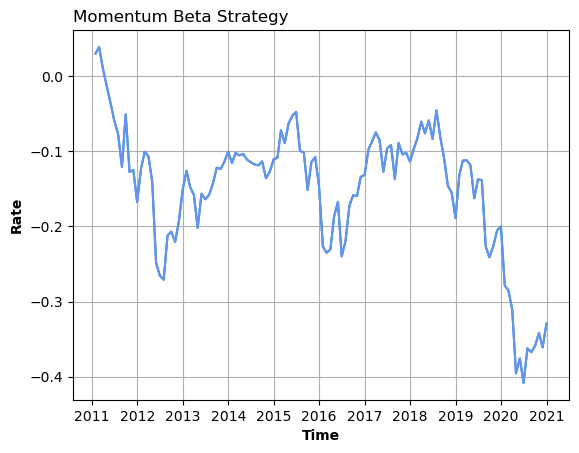

In [23]:
beta_plot = plt.plot(spread.cumsum())
plt.plot(spread.cumsum(),'cornflowerblue')
plt.title('Momentum Beta Strategy', loc= 'left')
plt.grid(True) # εμφάνιση πλέγματος
plt.axis('tight') # προσαρμογή αξόνων
plt.xlabel('Time' , fontweight = 'bold') # τίτλος άξονα x
plt.ylabel('Rate' , fontweight = 'bold') # τίτλος άξονα y

In [20]:
SP_I['SP500'].describe()

count    132.000000
mean       0.009152
std        0.040532
min       -0.133668
25%       -0.013973
50%        0.014930
75%        0.031003
max        0.119421
Name: SP500, dtype: float64

Text(0, 0.5, 'Rate')

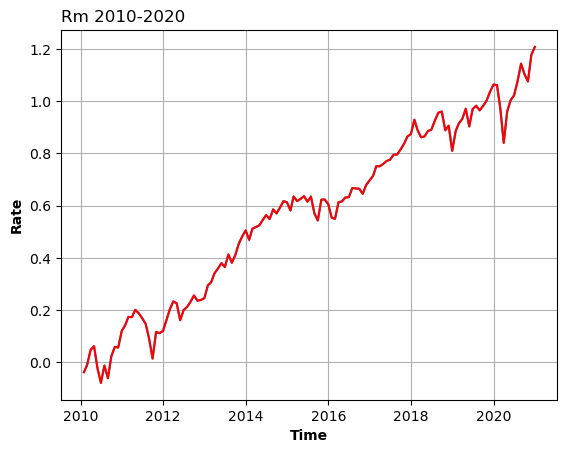

In [22]:
SP_plot = plt.plot(SP_I['SP500'].cumsum())
plt.plot(SP_I['SP500'].cumsum(), 'r')
plt.title('Rm 2010-2020', loc= 'left')
plt.grid(True) # εμφάνιση πλέγματος
plt.axis('tight') # προσαρμογή αξόνων
plt.xlabel('Time' , fontweight = 'bold') # τίτλος άξονα x
plt.ylabel('Rate' , fontweight = 'bold') # τίτλος άξονα y

#βλέπουμε ότι ο δείκτης κινείται ανοδικά σε αντίθεση με την στρατηγική μου
#στην αρχ΄ή του 2010 έχουμε ανοδική πορεία και στις δύο καμπύλες, με αποτέλεσμα η στρατηγική που έχω επιλέξει να είναι αποτελεσματική
#ωστόσο, μετά οι δύο καμπύλες έχουν αντίθετη πορεία με αποτέλεσμα η momentoum στρατηγική να μην είναι αποτελεσματική
#για να βγω κερδισμένος θα πρέπει να πουλάω winners και να πουλάω losers
#η στρατηγική αυτή ονομάζεται contrarian